# Exploratory Data Analysis (EDA)

The Titanic Dataset is a very good dataset for begineers to start a journey in data science.

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 

You can read more about this : https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic

In [29]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
data=pd.read_csv('data/train.csv')

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# number of unique values
data.nunique()

PassengerId    893
Survived         2
Pclass           3
Name           891
Sex              2
Age             90
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Missing values

In [23]:
#checking for missing values
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

In [30]:
# get Age data
age = data['Age']
df = pd.DataFrame(age)

# imputer
df["most_frequent"] = SimpleImputer(strategy = "most_frequent").fit_transform(df[['Age']])

df["mean"] = SimpleImputer(strategy = "mean").fit_transform(df[['Age']])

df["median"] = SimpleImputer(strategy = "median").fit_transform(df[['Age']])

df["constant"]  = SimpleImputer(strategy = "constant", fill_value = 0).fit_transform(df[['Age']])

df[:6].style.apply(lambda x: ['background: lightgreen' if  pd.isnull(x['Age']) else '' for i in x], axis=1)

,Age,most_frequent,mean,median,constant
0,22.000000,22.000000,22.000000,22.000000,22.000000
1,38.000000,38.000000,38.000000,38.000000,38.000000
2,26.000000,26.000000,26.000000,26.000000,26.000000
3,35.000000,35.000000,35.000000,35.000000,35.000000
4,35.000000,35.000000,35.000000,35.000000,35.000000
5,nan,24.000000,30.311690,28.000000,0.000000


In [32]:
# groupby
df = data[['Age', 'Sex']].copy()
print(df.groupby('Sex')['Age'].mean())

df['groupby_mean'] = df.groupby("Sex").transform(lambda x: x.fillna(x.mean()))
# just for highlight
df[:6].style.apply(lambda x: ['background: lightgreen' if  pd.isnull(x['Age']) else '' for i in x], axis=1)

Sex
female    27.915709
male      31.686088
Name: Age, dtype: float64


,Age,Sex,groupby_mean
0,22.000000,male,22.000000
1,38.000000,female,38.000000
2,26.000000,female,26.000000
3,35.000000,female,35.000000
4,35.000000,male,35.000000
5,nan,male,31.686088


> # Task #1:
Fill the missing value using gropby Sex and Pclass (don't need to display)

In [54]:
# groupby task #1
df = data[['Age', 'Sex', 'Pclass']].copy()
print(df.groupby(['Sex', 'Pclass'])['Age'].mean())

# your code here


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         42.504118
        2         30.740707
        3         27.710315
Name: Age, dtype: float64


### How many Survived??

Survived: 
0    550
1    343
Name: Survived, dtype: int64


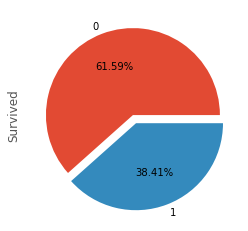

In [33]:
# count values
s_temp = data['Survived'].value_counts()
print(f'Survived: \n{s_temp}')

# pie chart
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%')
plt.show()

### Categorical Features:

Sex, Embarked, PClass, PassengerId, Cabin etc


### Numerical Features:

Age, fare, SibSp etc

In [44]:
# data

# Categorical Features Analysis:

male      579
female    314
Name: Sex, dtype: int64


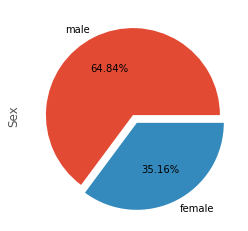

In [70]:
# count
temp = data.Sex.value_counts()
print(temp)

# pie 
data['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%')
plt.show()

In [56]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           469
        1           110
Name: Survived, dtype: int64

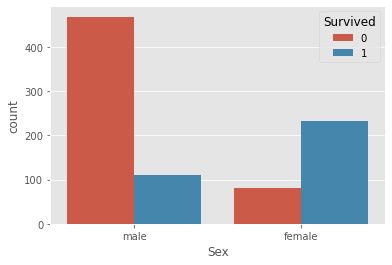

In [57]:
sns.countplot('Sex',hue='Survived',data=data)
plt.show()

### Understanting
The number of men on the ship is lot more than the number of women. Men =65% and Women=35%. Still the number of women saved is almost twice the number of males saved. 

> # Task #2
Do the same analysis on Pclass column and write one line Understanding.

In [ ]:
# 

**Lets check survival rate with Sex and Pclass Together.**

In [73]:
pd.crosstab([data['Sex'], data['Survived']], data.Pclass,margins=True).style.background_gradient()

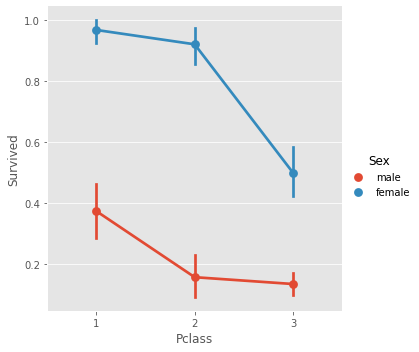

In [74]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Understanding

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

> # Task 3 :
Do the CrossTab and FactorPlot for Sex and Embarked columns (with unserstanding)
